<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.724290,29.171604,37.595500,-0.006051,169.485344,169.491059,-0.005715
1,0.0,1.0,38.305915,92.897402,30.791373,-0.000805,171.993885,171.994520,-0.000635
2,0.0,2.0,47.716035,75.885158,25.468078,-0.001286,159.067984,159.069022,-0.001037
3,0.0,3.0,98.091949,95.301725,65.875207,-0.001860,269.267021,269.269325,-0.002304
4,0.0,4.0,72.534543,84.430238,36.476893,-0.000998,203.440676,203.441786,-0.001110
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.239560,61.080521,66.358917,0.003857,164.682856,164.679648,0.003208
59996,999.0,56.0,47.985230,56.871165,96.511497,0.001992,211.369884,211.369298,0.000586
59997,999.0,57.0,88.727066,67.343759,88.285918,0.003301,254.360044,254.358000,0.002044
59998,999.0,58.0,98.942962,30.162503,48.046713,0.019188,187.171366,187.152206,0.019159


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    92.724290  29.171604  37.595500 -0.006051  169.485344   
      1.0    38.305915  92.897402  30.791373 -0.000805  171.993885   
      2.0    47.716035  75.885158  25.468078 -0.001286  159.067984   
      3.0    98.091949  95.301725  65.875207 -0.001860  269.267021   
      4.0    72.534543  84.430238  36.476893 -0.000998  203.440676   
...                ...        ...        ...       ...         ...   
999.0 55.0   27.239560  61.080521  66.358917  0.003857  164.682856   
      56.0   47.985230  56.871165  96.511497  0.001992  211.369884   
      57.0   88.727066  67.343759  88.285918  0.003301  254.360044   
      58.0   98.942962  30.162503  48.046713  0.019188  187.171366   
      59.0   90.663067  88.252264  23.555517 -0.001809  212.469039   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    169.491059 -0.005715  
      1.0    171.994520 -0.000635  
      2.0    159.069022 -0.001037  
      3.0    269.269325 -0.002304  
      4.0    203.441786 -0.001110  
...                 ...       ...  
999.0 55.0   164.679648  0.003208  
      56.0   211.369298  0.000586  
      57.0   254.358000  0.002044  
      58.0   187.152206  0.019159  
      59.0   212.470550 -0.001511  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    92.724290  29.171604  37.595500 -0.006051  169.485344   
      1.0    38.305915  92.897402  30.791373 -0.000805  171.993885   
      2.0    47.716035  75.885158  25.468078 -0.001286  159.067984   
      3.0    98.091949  95.301725  65.875207 -0.001860  269.267021   
      4.0    72.534543  84.430238  36.476893 -0.000998  203.440676   
...                ...        ...        ...       ...         ...   
999.0 55.0   27.239560  61.080521  66.358917  0.003857  164.682856   
      56.0   47.985230  56.871165  96.511497  0.001992  211.369884   
      57.0   88.727066  67.343759  88.285918  0.003301  254.360044   
      58.0   98.942962  30.162503  48.046713  0.019188  187.171366   
      59.0   90.663067  88.252264  23.555517 -0.001809  212.469039   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    169.491059 -0.005715  
      1.0    171.994520 -0.000635  
      2.0    159.069022 -0.001037  
      3.0    269.269325 -0.002304  
      4.0    203.441786 -0.001110  
...                 ...       ...  
999.0 55.0   164.679648  0.003208  
      56.0   211.369298  0.000586  
      57.0   254.358000  0.002044  
      58.0   187.152206  0.019159  
      59.0   212.470550 -0.001511  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.724290,29.171604,37.595500,-0.006051,169.485344,169.491059,-0.005715
1,0.0,1.0,38.305915,92.897402,30.791373,-0.000805,171.993885,171.994520,-0.000635
2,0.0,2.0,47.716035,75.885158,25.468078,-0.001286,159.067984,159.069022,-0.001037
3,0.0,3.0,98.091949,95.301725,65.875207,-0.001860,269.267021,269.269325,-0.002304
4,0.0,4.0,72.534543,84.430238,36.476893,-0.000998,203.440676,203.441786,-0.001110
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.239560,61.080521,66.358917,0.003857,164.682856,164.679648,0.003208
59996,999.0,56.0,47.985230,56.871165,96.511497,0.001992,211.369884,211.369298,0.000586
59997,999.0,57.0,88.727066,67.343759,88.285918,0.003301,254.360044,254.358000,0.002044
59998,999.0,58.0,98.942962,30.162503,48.046713,0.019188,187.171366,187.152206,0.019159


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    92.724290  29.171604  37.595500 -0.006051  169.485344   
      1.0    38.305915  92.897402  30.791373 -0.000805  171.993885   
      2.0    47.716035  75.885158  25.468078 -0.001286  159.067984   
      3.0    98.091949  95.301725  65.875207 -0.001860  269.267021   
      4.0    72.534543  84.430238  36.476893 -0.000998  203.440676   
...                ...        ...        ...       ...         ...   
999.0 55.0   27.239560  61.080521  66.358917  0.003857  164.682856   
      56.0   47.985230  56.871165  96.511497  0.001992  211.369884   
      57.0   88.727066  67.343759  88.285918  0.003301  254.360044   
      58.0   98.942962  30.162503  48.046713  0.019188  187.171366   
      59.0   90.663067  88.252264  23.555517 -0.001809  212.469039   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    169.491059 -0.005715  
      1.0    171.994520 -0.000635  
      2.0    159.069022 -0.001037  
      3.0    269.269325 -0.002304  
      4.0    203.441786 -0.001110  
...                 ...       ...  
999.0 55.0   164.679648  0.003208  
      56.0   211.369298  0.000586  
      57.0   254.358000  0.002044  
      58.0   187.152206  0.019159  
      59.0   212.470550 -0.001511  

[60000 rows x 7 columns]

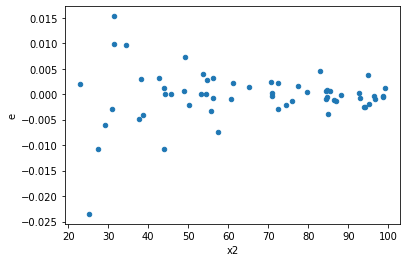

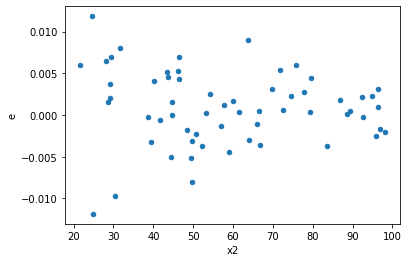

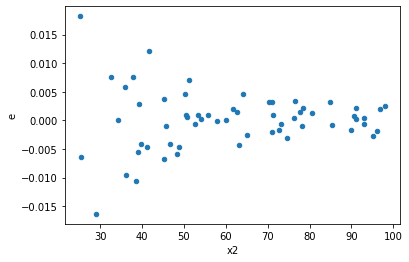

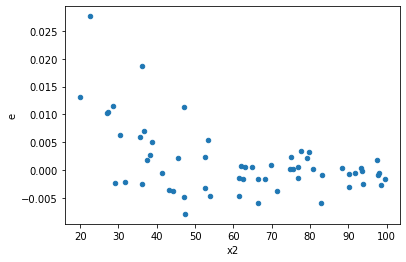

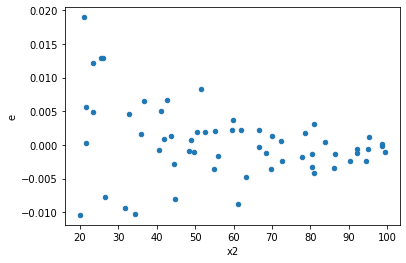

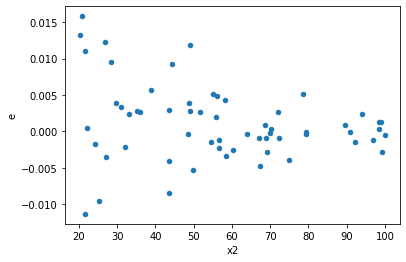

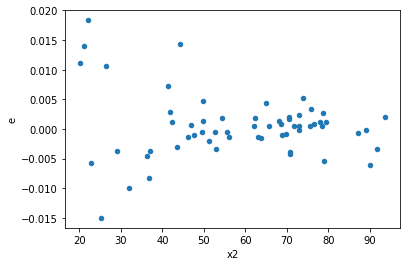

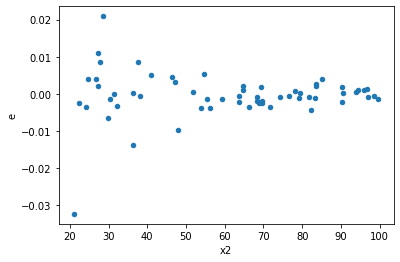

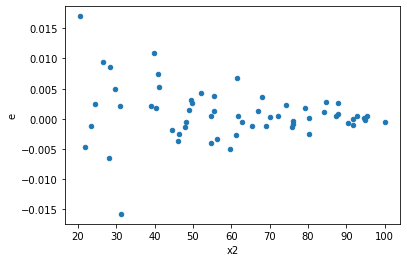

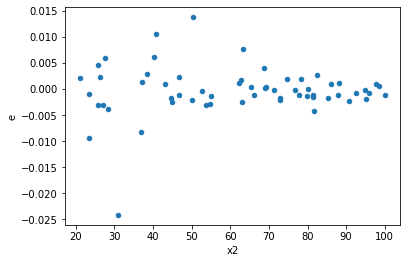

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,25.0,29.0,0.00020568006645771338,0.0007673816083091446,8.227202658308535e-06,2.646143476928085e-05,3.21633438098888,0.002979841078784684,0.9985100794606077,0.001489920539392342,Reject001=0 : Heteroscedasticity
4.0,30.0,24.0,0.0006480264666771867,0.0008565768552545904,2.160088222257289e-05,3.56907023022746e-05,1.6522798436898043,0.21054993110455644,0.8947250344477218,0.10527496555227822,Reject001=1 : Homoscedasticity
5.0,32.0,22.0,0.0006988767268642516,0.0004981486968999666,2.1839897714507862e-05,2.2643122586362116e-05,1.0367778678432493,0.9466302849352308,0.5266848575323846,0.4733151424676154,Reject001=1 : Homoscedasticity
6.0,30.0,24.0,0.00038611445632281337,0.0010536826786214457,1.2870481877427113e-05,4.3903444942560236e-05,3.4111733624799445,0.0029489406624374492,0.9985255296687813,0.0014744703312187246,Reject001=0 : Heteroscedasticity
7.0,35.0,19.0,0.00025362886271704607,0.001504451354546773,7.246538934772745e-06,7.918165023930385e-05,10.926823267221847,1.0492149191687616e-06,0.9999994753925404,5.246074595843808e-07,Reject001=0 : Heteroscedasticity
9.0,33.0,21.0,0.0006422202996480767,0.00044684388141947754,1.946122120145687e-05,2.127828006759417e-05,1.0933681831847877,0.8463232894151005,0.5768383552924498,0.42316164470755024,Reject001=1 : Homoscedasticity
10.0,27.0,27.0,0.00028230127142460463,0.0007507112302805928,1.0455602645355726e-05,2.7804119640021956e-05,2.659255576470503,0.013495035211732898,0.9932524823941336,0.006747517605866449,Reject001=1 : Homoscedasticity
13.0,34.0,20.0,0.00027596308079727686,0.0006018428152844262,8.116561199919907e-06,3.0092140764221313e-05,3.7074987821835506,0.0030007936920859457,0.998499603153957,0.0015003968460429729,Reject001=0 : Heteroscedasticity
15.0,25.0,29.0,0.00016501135947546462,0.0007085385003993674,6.600454379018585e-06,2.443236208273681e-05,3.701618203801544,0.0009340363829053455,0.9995329818085473,0.00046701819145267276,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,39.0,15.0,0.0014492703831789158,8.61537828482019e-05,3.716077905586964e-05,5.7435855232134596e-06,0.15456041743845642,2.656118880553338e-06,Reject001=0 : Heteroscedasticity
1.0,22.0,32.0,0.0006147244935388105,0.00046794006091345833,2.7942022433582296e-05,1.4623126903545573e-05,0.5233381706103949,0.11662972642697386,Reject001=1 : Homoscedasticity
2.0,25.0,29.0,0.00020568006645771338,0.0007673816083091446,8.227202658308535e-06,2.646143476928085e-05,3.21633438098888,0.002979841078784684,Reject001=0 : Heteroscedasticity
3.0,36.0,18.0,0.0014159974942081679,0.00010436474750834841,3.933326372800466e-05,5.798041528241578e-06,0.1474080963211162,1.2175297124117457e-06,Reject001=0 : Heteroscedasticity
4.0,30.0,24.0,0.0006480264666771867,0.0008565768552545904,2.160088222257289e-05,3.56907023022746e-05,1.6522798436898043,0.21054993110455644,Reject001=1 : Homoscedasticity
5.0,32.0,22.0,0.0006988767268642516,0.0004981486968999666,2.1839897714507862e-05,2.2643122586362116e-05,1.0367778678432493,0.9466302849352308,Reject001=1 : Homoscedasticity
6.0,30.0,24.0,0.00038611445632281337,0.0010536826786214457,1.2870481877427113e-05,4.3903444942560236e-05,3.4111733624799445,0.0029489406624374492,Reject001=0 : Heteroscedasticity
7.0,35.0,19.0,0.00025362886271704607,0.001504451354546773,7.246538934772745e-06,7.918165023930385e-05,10.926823267221847,1.0492149191687616e-06,Reject001=0 : Heteroscedasticity
8.0,23.0,31.0,0.0006956736814447207,0.00039571137731464647,3.0246681801944378e-05,1.2764883139182144e-05,0.4220259009820233,0.03557582187115465,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    595
Reject001=1 : Homoscedasticity      405
Name: Result_test, dtype: int64